# Bootcamp Data Science Aplicada - Alura

# Módulo 02 - Visualização de Dados com Seaborn e Matplotlib

**Obs.** Notabook para o acompanhamento das aulas e resolução dos desafios propostos. Caso necessário, dividirei em mais de um notebook.

## Aula 01 - Fontes Externas, Limpeza e Manipulação de Dados

Iniciou-se revisando o notebook do módulo anterior e comparando o valor "bruto" com o valor absoluto de gastos.

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from io import StringIO
import seaborn as sns
from datetime import date

# bibliotecas utilizadas na parte de web scraping
import requests
from bs4 import BeautifulSoup

# fomatação dos números para duas casas decimais
pd.options.display.float_format = "{:.2f}".format

### Resumo dos dataframes usados no módulo passado, para caso algum seja reutilizado nesse módulo 2

In [2]:
dados = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/agendamento-hospitalar/main/dados/A160324189_28_143_208.csv",
                    encoding = 'ISO-8859-1', skiprows = 3, sep = ';',
                    skipfooter = 12, thousands = '.', decimal = ',', engine = 'python')

In [3]:
colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0, "Unidade da Federação")
usaveis = dados[colunas_usaveis]
usaveis = usaveis.set_index("Unidade da Federação")
usaveis = usaveis.drop("Total", axis = 1)
usaveis["Total"] = usaveis.sum(axis = 1)
ordenado_por_total = usaveis.sort_values("Total", ascending = False)
ordenado_por_total = ordenado_por_total.drop("Total", axis = 1)
ordenado_por_total = ordenado_por_total / 1000000
meses_filtrados = ordenado_por_total.columns[47:150]
mes_mais_recente = ordenado_por_total.columns[-1]
gastos_do_mais_recente = ordenado_por_total[mes_mais_recente]
gastos_do_mais_recente = gastos_do_mais_recente.sort_values(ascending = False)
gastos_proporcionais = gastos_do_mais_recente / gastos_do_mais_recente.sum()

### Aulas 01 & 02

In [4]:
ibge_estimativa = pd.read_excel("https://github.com/alura-cursos/agendamento-hospitalar/raw/main/dados/estimativa_dou_2020.xls")
ibge_estimativa.head()

,ESTIMATIVAS DA POPULAÇÃO RESIDENTE NO BRASIL E UNIDADES DA FEDERAÇÃO COM DATA DE REFERÊNCIA EM 1º DE JULHO DE 2020,Unnamed: 1,Unnamed: 2
0,BRASIL E UNIDADES DA FEDERAÇÃO,NaN,POPULAÇÃO ESTIMADA
1,Brasil,NaN,211755692
2,Região Norte,NaN,18672591
3,Rondônia,NaN,1796460
4,Acre,NaN,894470


In [5]:
dados_da_populacao = """Posição	Unidade federativa	População	% da pop. total	País comparável
(habitantes)

1	 São Paulo	46 289 333	21,9%	Flag of Spain.svg Espanha (46 439 864)
2	 Minas Gerais	21 292 666	10,1%	 Sri Lanka (20 675 000)
3	 Rio de Janeiro	17 366 189	8,2%	 Países Baixos (16 922 900)
4	Bahia Bahia	14 930 634	7,1%	 Chade (14 037 000)
5	 Paraná	11 516 840	5,4%	 Bolívia (11 410 651)
6	 Rio Grande do Sul	11 422 973	5,4%	 Bélgica (11 250 659)
7	 Pernambuco	9 616 621	4,5%	 Bielorrússia (9 485 300)
8	 Ceará	9 187 103	4,3%	 Emirados Árabes Unidos (9 157 000)
9	Pará Pará	8 690 745	4,1%	 Áustria (8 602 112)
10	 Santa Catarina	7 252 502	3,4%	 Sérvia (7 114 393)
11	 Maranhão	7 114 598	3,4%	 Paraguai (7 003 406)
12	 Goiás	7 113 540	3,4%	 Paraguai (7 003 406)
13	 Amazonas	4 207 714	2,0%	 Líbano (4 168 000)
14	 Espírito Santo	4 064 052	1,9%	 Líbano (4 168 000)
15	 Paraíba	4 039 277	1,9%	 Líbano (4 168 000)
16	 Rio Grande do Norte	3 534 165	1,7%	 Uruguai (3 415 866)
17	 Mato Grosso	3 526 220	1,7%	 Uruguai (3 415 866)
18	 Alagoas	3 351 543	1,6%	 Uruguai (3 415 866)
19	 Piauí	3 281 480	1,6%	 Kuwait (3 268 431)
20	 Distrito Federal	3 055 149	1,4%	 Lituânia (2 900 787)
21	 Mato Grosso do Sul	2 809 394	1,3%	 Jamaica (2 717 991)
22	 Sergipe	2 318 822	1,1%	 Namíbia (2 280 700)
23	 Rondônia	1 796 460	0,8%	 Gabão (1 725 000)
24	 Tocantins	1 590 248	0,7%	 Bahrein (1 359 800)
25	 Acre	894 470	0,4%	 Fiji (859 178)
26	 Amapá	861 773	0,4%	 Fiji (859 178)
27	 Roraima	631 181	0,3%	 Luxemburgo (562 958)"""

# fonte: https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o

- Um referência interessante sobre **StringIO**: [Manipulando Strings Como Se Fossem Arquivos](https://pythonhelp.wordpress.com/2014/06/19/manipulando-strings-como-se-fossem-arquivos-stringio/)

In [6]:
# converte a string para stringIO
dados_da_populacao_io = StringIO(dados_da_populacao)

# lê os dados que colamos acima em um pandas dataframe
populacao = pd.read_csv(dados_da_populacao_io, sep="\t")

# dropar os valores NaN
populacao = populacao.dropna()

# remove os espaços nos números
populacao["populacao"] = populacao["População"].str.replace(" ", "").astype(int)

# muda o nome da coluna
populacao["uf"] = populacao["Unidade federativa"]

# coloca a uf como índice
populacao = populacao[["populacao", "uf"]].set_index("uf")


display(populacao.head())
display(populacao.info())

,populacao
uf,
São Paulo,46289333
Minas Gerais,21292666
Rio de Janeiro,17366189
Bahia Bahia,14930634
Paraná,11516840


<class 'pandas.core.frame.DataFrame'>
Index: 27 entries,  São Paulo to  Roraima
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   populacao  27 non-null     int64
dtypes: int64(1)
memory usage: 432.0+ bytes


None

In [7]:
gastos_do_mais_recente.index = gastos_do_mais_recente.index.str[3:]

In [8]:
populacao.index = populacao.index.str.strip()

In [9]:
for estado in gastos_do_mais_recente.index:
  # print(f"{estado} {estado} => {estado}")
  populacao.index = populacao.index.str.replace(f"{estado} {estado}", estado)
populacao.index

Index(['São Paulo', 'Minas Gerais', 'Rio de Janeiro', 'Bahia', 'Paraná',
       'Rio Grande do Sul', 'Pernambuco', 'Ceará', 'Pará', 'Santa Catarina',
       'Maranhão', 'Goiás', 'Amazonas', 'Espírito Santo', 'Paraíba',
       'Rio Grande do Norte', 'Mato Grosso', 'Alagoas', 'Piauí',
       'Distrito Federal', 'Mato Grosso do Sul', 'Sergipe', 'Rondônia',
       'Tocantins', 'Acre', 'Amapá', 'Roraima'],
      dtype='object', name='uf')

In [10]:
gastos_e_populacao_recente = populacao.join(gastos_do_mais_recente)
gastos_e_populacao_recente.head()

,populacao,2020/Jul
uf,,
São Paulo,46289333,282.71
Minas Gerais,21292666,120.47
Rio de Janeiro,17366189,71.54
Bahia,14930634,58.90
Paraná,11516840,80.32


### Desafio 01 - Entre nos dados da Wikipédia e leia a base de dados direto da Wikipédia.

Para resolver esse desafio precisamos usar da técnica de **_web scraping_**.

- Link para obtenção dos dados: https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o

- [Web Scraping a Wikipedia Table into a Dataframe](https://medium.com/analytics-vidhya/web-scraping-a-wikipedia-table-into-a-dataframe-c52617e1f451)

In [11]:
# url que utilizaremos
url_wiki = 'https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o'

# fazemos uma 'requisição' na página e guardamos em 'response'
response = requests.get(url_wiki)

Há muitas controvérsias sobre a legalidade de se realizar web scraping, mas, no nosso caso, a Wikipédia permite realizarmos o _web scraping_ para fins de estudo, e de uma forma responsável, sem mandar muitos _requests_ ao mesmo tempo para a página.

Então vamos em frente.

<img width = "1400" src="https://raw.githubusercontent.com/diascarolina/data-science-bootcamp/main/modulo2/inspect-element.png" />

Na imagem vemos o que obtemos ao clicarmos com o botão direito do mouse na página da Wikipédia que queremos obter os dados e escolhermos "Inspecionar Elemento". Isso mostra as tags HTML de cada objeto. Observe que, na tabela em si, temos a tag ```<table>```. Essa informação é crucial na hora de realizarmos o _web scraping_.

In [12]:
# instância do BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# pega a tabela
populacao_tabela = soup.find('table', {'class':"wikitable"})

In [13]:
# lê a tabela com o pandas
pop = pd.read_html(str(populacao_tabela))

# transforma num pandas dataframe
pop = pd.DataFrame(pop[0])

In [14]:
pop.head()

,Posição,Unidade federativa,População,% da pop. total,País comparável (habitantes)
0,1,São Paulo,46 289 333,"21,9%",Espanha (46 439 864)
1,2,Minas Gerais,21 292 666,"10,1%",Sri Lanka (20 675 000)
2,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900)
3,4,Bahia,14 930 634,"7,1%",Chade (14 037 000)
4,5,Paraná,11 516 840,"5,4%",Bolívia (11 410 651)


Agora temos um pandas dataframe com as informações diretamente da Wikipédia. Vamos limpá-lo um pouco e salvá-lo em um arquivo .csv.

In [15]:
pop.columns

Index(['Posição', 'Unidade federativa', 'População', '% da pop. total',
       'País comparável (habitantes)'],
      dtype='object')

In [16]:
pop = pop.drop(['Posição', '% da pop. total', 'País comparável (habitantes)'], axis = 1)

In [17]:
pop.columns = ['Unidade da Federacao', 'habitantes']

# nessa parte tive diversos bugs pois inicialmente fiz uma listas de listas, quando é necessário apenas uma única lista

In [18]:
pop["habitantes"] = pop["habitantes"].str.replace(" ", "").astype(int)

In [19]:
pop.head()

,Unidade da Federacao,habitantes
0,São Paulo,46289333
1,Minas Gerais,21292666
2,Rio de Janeiro,17366189
3,Bahia,14930634
4,Paraná,11516840


In [20]:
pop = pop.set_index('Unidade da Federacao').rename_axis(None)

In [21]:
pop.head()

,habitantes
São Paulo,46289333
Minas Gerais,21292666
Rio de Janeiro,17366189
Bahia,14930634
Paraná,11516840


Ufa! Finalmente temos nosso dataframe limpo. Vamos salvá-lo em formato .csv.

In [22]:
# descomentar para salvar o csv
# pop.to_csv(r'../data/populacao_estados_br.csv')

### Desafio 02 - Neste desafio temos uma série de passos:
- Padronizar os nomes das colunas
- Transformar os dados nos tipos corretos
- Transformar a UF em index

Queremos fazer isso com os dois dataframes que temos: ```pop``` e ```gastos_do_mais_recente```.

In [23]:
pop.head()

,habitantes
São Paulo,46289333
Minas Gerais,21292666
Rio de Janeiro,17366189
Bahia,14930634
Paraná,11516840


In [24]:
pop.dtypes

habitantes    int64
dtype: object

In [25]:
gastos_do_mais_recente.head()

Unidade da Federação
São Paulo           282.71
Minas Gerais        120.47
Paraná               80.32
Rio Grande do Sul    78.93
Rio de Janeiro       71.54
Name: 2020/Jul, dtype: float64

Os dois dataframes já estão pronto para o ```join```, pois realizamos a limpeza anteriormente.

In [26]:
gastos_e_pop_recente = pop.join(gastos_do_mais_recente)

In [27]:
gastos_e_pop_recente.head()

,habitantes,2020/Jul
São Paulo,46289333,282.71
Minas Gerais,21292666,120.47
Rio de Janeiro,17366189,71.54
Bahia,14930634,58.90
Paraná,11516840,80.32


### Desafio 03 - Buscar na documentação alguns métodos envolvendo strings

- [Python String Methods](https://www.w3schools.com/python/python_ref_string.asp)

- [Pandas Documentation on .str](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.html)

Entre os métodos que achei mais interessantes estão:
- ```count()``` -> Returns the number of times a specified value occurs in a string
- ```encode()``` -> Returns an encoded version of the string
- ```isnumeric()``` -> Returns True if all characters in the string are numeric

### Desafio 04 - Desenvolver uma função para a limpeza e tratamento dos dados, retornando duas tabelas "população" e "unida".

Acho que este desafio não está bem definido, pois está vago. Entendi que devemos fazer uma função especificamente para os dados utilizados nessa aula.

In [28]:
def data_cleaning(url_dados, url_wiki):
    '''
    Recebe duas urls. A primeira é a url dos dados em .csv
    e a segunda é a url da pagina da Wikipédia para scraping
    Retorna dois dataframes:
        - populacao: dataframe obtido atráves da url
        - unida: um dataframe com os dados populacionais e os dados fornecidos originalmente
    '''
    
    # leitura e limpeza da url_dados
    dados = pd.read_csv(url_dados, encoding = 'ISO-8859-1', skiprows = 3, sep = ';',
                    skipfooter = 12, thousands = '.', decimal = ',', engine = 'python')
    
    colunas_usaveis = dados.mean().index.tolist()
    colunas_usaveis.insert(0, "Unidade da Federação")
    usaveis = dados[colunas_usaveis]
    usaveis = usaveis.set_index("Unidade da Federação")
    usaveis = usaveis.drop("Total", axis = 1)
    usaveis["Total"] = usaveis.sum(axis = 1)
    ordenado_por_total = usaveis.sort_values("Total", ascending = False)
    ordenado_por_total = ordenado_por_total.drop("Total", axis = 1)
    ordenado_por_total = ordenado_por_total / 1000000
    meses_filtrados = ordenado_por_total.columns[47:150]
    mes_mais_recente = ordenado_por_total.columns[-1]
    gastos_do_mais_recente = ordenado_por_total[mes_mais_recente]
    gastos_do_mais_recente = gastos_do_mais_recente.sort_values(ascending = False)
    gastos_do_mais_recente.index = gastos_do_mais_recente.index.str[3:]
    
    # web scraping part
    response = requests.get(url_wiki)
    soup = BeautifulSoup(response.text, 'html.parser')
    populacao_tabela = soup.find('table', {'class':"wikitable"})
    populacao = pd.read_html(str(populacao_tabela))
    populacao = pd.DataFrame(populacao[0])
    
    # limpeza dessa tabela
    populacao = populacao[['Unidade federativa', 'População']]
    populacao.columns = ['UF', 'pop']
    populacao["pop"] = populacao["pop"].str.replace(" ", "").astype(int)
    populacao = populacao.set_index('UF').rename_axis(None)
    
    
    # o dataframe 'gastos_do_mais_recente' já está limpo
    # então já podemos fazer um join com 'populacao'
    unida = populacao.join(gastos_do_mais_recente)
    
    return populacao, unida   

In [29]:
url_dados = 'https://raw.githubusercontent.com/alura-cursos/agendamento-hospitalar/main/dados/A160324189_28_143_208.csv'
url_wikipedia = 'https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o'

populacao_teste, unida_teste = data_cleaning(url_dados, url_wikipedia)

In [30]:
populacao_teste.head()

,pop
São Paulo,46289333
Minas Gerais,21292666
Rio de Janeiro,17366189
Bahia,14930634
Paraná,11516840


In [31]:
unida_teste.head()

,pop,2020/Jul
São Paulo,46289333,282.71
Minas Gerais,21292666,120.47
Rio de Janeiro,17366189,71.54
Bahia,14930634,58.90
Paraná,11516840,80.32


### O que aprendemos nessa aula:
- Como comparar os gastos em relação a determinado estado;
- Como fazer a leitura de dados no formato Excel com Pandas;
- Como tornar uma string em (com formato de tabela) legível em pandas usando o String.IO;
- Como usar Join em Pandas.

## Aula 02 - Visualização, Seaborn e Proporcionalidades

Começamos com uma discussão sobre práticas ruins que podem acontecer na plotagem de gráficos.

Temos o seguinte dataframe:

In [32]:
gastos_e_pop_recente.head()

,habitantes,2020/Jul
São Paulo,46289333,282.71
Minas Gerais,21292666,120.47
Rio de Janeiro,17366189,71.54
Bahia,14930634,58.90
Paraná,11516840,80.32


<AxesSubplot:xlabel='uf'>

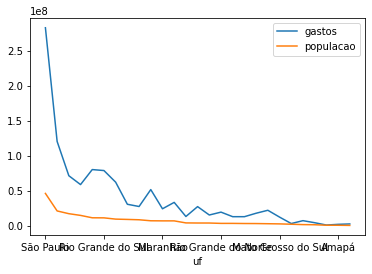

In [33]:
# exemplo de péssimo gráfico
gastos_e_populacao_recente["gastos"] = gastos_e_populacao_recente["2020/Jul"] * 1000000
gastos_e_populacao_recente[["gastos", "populacao"]].plot()

In [34]:
gastos_e_populacao_recente["gasto_por_habitante"] = gastos_e_populacao_recente["gastos"] / gastos_e_populacao_recente["populacao"]
gastos_e_populacao_recente.head()

,populacao,2020/Jul,gastos,gasto_por_habitante
uf,,,,
São Paulo,46289333,282.71,282709570.31,6.11
Minas Gerais,21292666,120.47,120467187.34,5.66
Rio de Janeiro,17366189,71.54,71540227.33,4.12
Bahia,14930634,58.90,58898100.40,3.94
Paraná,11516840,80.32,80320852.69,6.97


In [35]:
gastos_e_populacao_recente.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, São Paulo to Roraima
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   populacao            27 non-null     int64  
 1   2020/Jul             27 non-null     float64
 2   gastos               27 non-null     float64
 3   gasto_por_habitante  27 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 2.1+ KB


<AxesSubplot:xlabel='uf'>

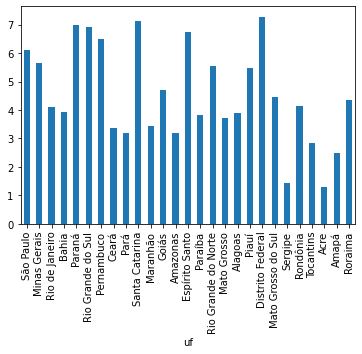

In [36]:
gastos_e_populacao_recente["gasto_por_habitante"].plot(kind = 'bar')

### Desafio 01: Ordenar o gráfico e criar uma visualização de gastos por habitantes ordenada. 

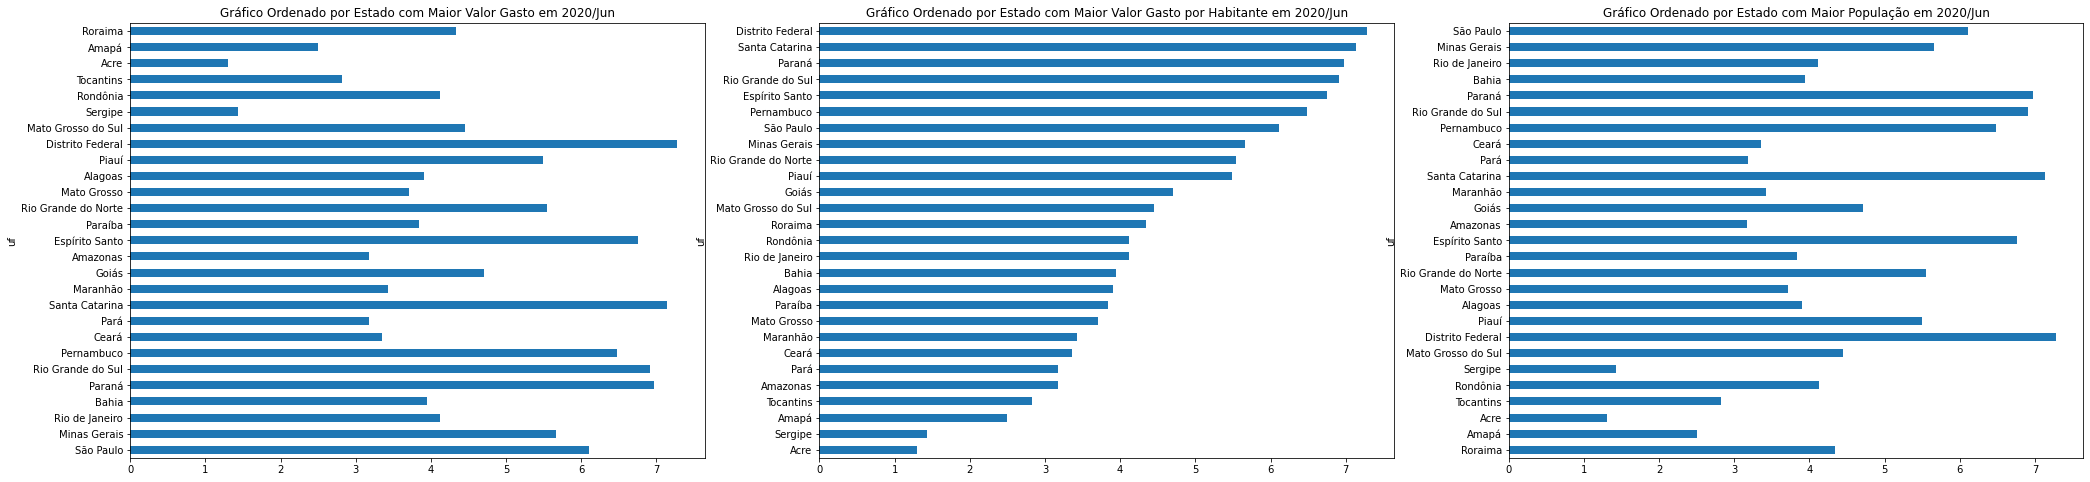

In [37]:
fig, axes = plt.subplots(1, 3, sharex = False, sharey = False, figsize = (35, 8))

gastos_e_populacao_recente["gasto_por_habitante"].plot(ax = axes[0], kind = 'barh')
axes[0].set_title('Gráfico Ordenado por Estado com Maior Valor Gasto em 2020/Jun')

gastos_e_populacao_recente.sort_values(by = 'gasto_por_habitante')["gasto_por_habitante"].plot(ax = axes[1], kind = 'barh')
axes[1].set_title('Gráfico Ordenado por Estado com Maior Valor Gasto por Habitante em 2020/Jun')

gastos_e_populacao_recente.sort_values(by = 'populacao')["gasto_por_habitante"].plot(kind = 'barh', ax = axes[2])
axes[2].set_title('Gráfico Ordenado por Estado com Maior População em 2020/Jun')


plt.show()

### Desafio 02: Fazer os mesmos gráficos do final da aulas 2.1 para meses anteriores, analisar e compartilhar suas hipóteses.

In [38]:
def data_cleaning(url_dados, url_wiki, ano_mes_desejado):
    '''
    Recebe duas urls. A primeira é a url dos dados em .csv
    e a segunda é a url da pagina da Wikipédia para scraping
    Retorna dois dataframes:
        - populacao: dataframe obtido atráves da url
        - unida: um dataframe com os dados populacionais e os dados fornecidos originalmente
    '''
    
    # leitura e limpeza da url_dados
    dados = pd.read_csv(url_dados, encoding = 'ISO-8859-1', skiprows = 3, sep = ';',
                    skipfooter = 12, thousands = '.', decimal = ',', engine = 'python')
    
    colunas_usaveis = dados.mean().index.tolist()
    colunas_usaveis.insert(0, "Unidade da Federação")
    usaveis = dados[colunas_usaveis]
    usaveis = usaveis.set_index("Unidade da Federação")
    usaveis = usaveis.drop("Total", axis = 1)
    usaveis["Total"] = usaveis.sum(axis = 1)
    ordenado_por_total = usaveis.sort_values("Total", ascending = False)
    ordenado_por_total = ordenado_por_total.drop("Total", axis = 1)
    ordenado_por_total = ordenado_por_total / 1000000
    meses_filtrados = ordenado_por_total.columns[47:150]
    mes_mais_recente = ordenado_por_total.columns[ordenado_por_total.columns.get_loc(ano_mes_desejado)]
    gastos_do_mais_recente = ordenado_por_total[mes_mais_recente]
    gastos_do_mais_recente = gastos_do_mais_recente.sort_values(ascending = False)
    gastos_do_mais_recente.index = gastos_do_mais_recente.index.str[3:]
    
    # web scraping part
    response = requests.get(url_wiki)
    soup = BeautifulSoup(response.text, 'html.parser')
    populacao_tabela = soup.find('table', {'class':"wikitable"})
    populacao = pd.read_html(str(populacao_tabela))
    populacao = pd.DataFrame(populacao[0])
    
    # limpeza dessa tabela
    populacao = populacao[['Unidade federativa', 'População']]
    populacao.columns = ['UF', 'pop']
    populacao["pop"] = populacao["pop"].str.replace(" ", "").astype(int)
    populacao = populacao.set_index('UF').rename_axis(None)
    
    
    # o dataframe 'gastos_do_mais_recente' já está limpo
    # então já podemos fazer um join com 'populacao'
    unida = populacao.join(gastos_do_mais_recente)
    
    return populacao, unida   

In [39]:
url_dados = 'https://raw.githubusercontent.com/alura-cursos/agendamento-hospitalar/main/dados/A160324189_28_143_208.csv'
url_wikipedia = 'https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o'

populacao_maio2011, unida_maio2011 = data_cleaning(url_dados, url_wikipedia, '2011/Mai')

In [40]:
unida_maio2011["gastos"] = unida_maio2011["2011/Mai"] * 1000000
unida_maio2011["gasto_por_habitante"] = unida_maio2011["gastos"] / unida_maio2011['pop']

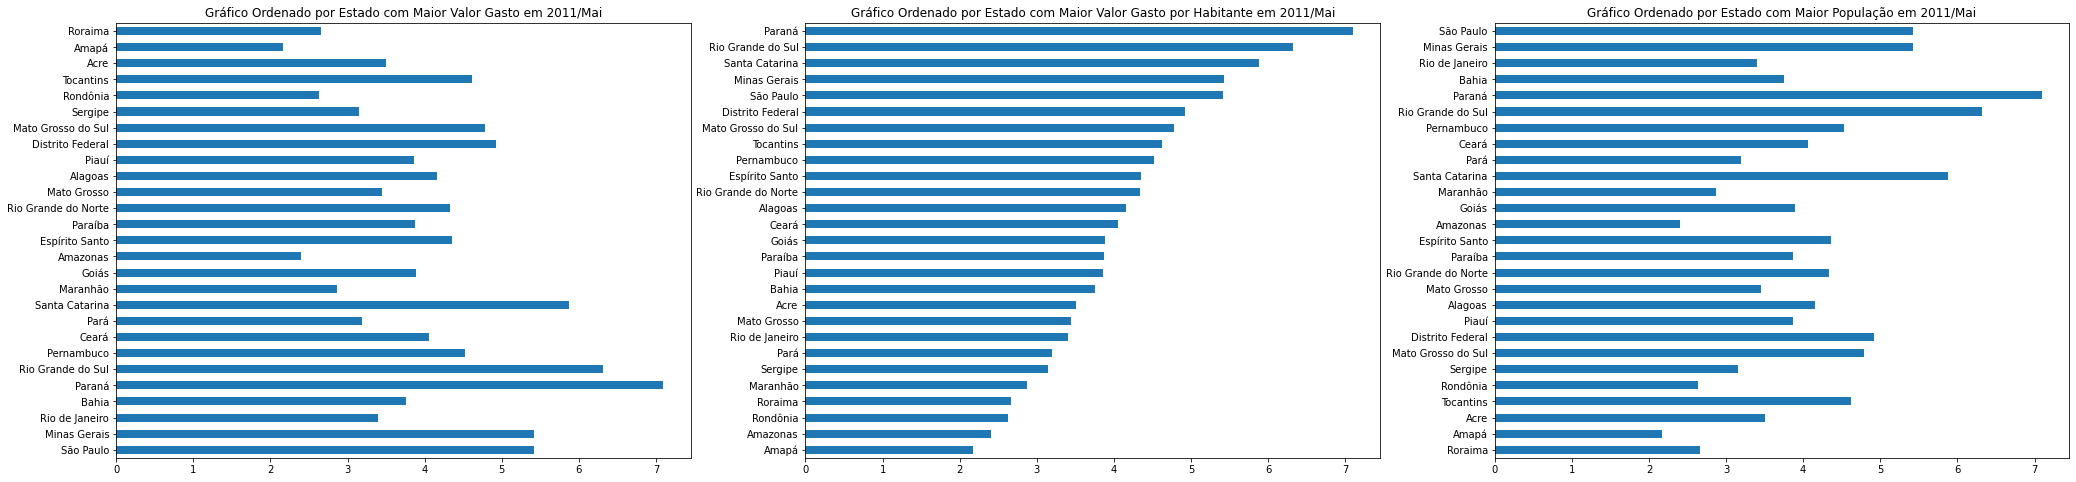

In [41]:
fig, axes = plt.subplots(1, 3, sharex = False, sharey = False, figsize = (35, 8))

unida_maio2011["gasto_por_habitante"].plot(ax = axes[0], kind = 'barh')
axes[0].set_title('Gráfico Ordenado por Estado com Maior Valor Gasto em 2011/Mai')

unida_maio2011.sort_values(by = 'gasto_por_habitante')["gasto_por_habitante"].plot(ax = axes[1], kind = 'barh')
axes[1].set_title('Gráfico Ordenado por Estado com Maior Valor Gasto por Habitante em 2011/Mai')

unida_maio2011.sort_values(by = 'pop')["gasto_por_habitante"].plot(kind = 'barh', ax = axes[2])
axes[2].set_title('Gráfico Ordenado por Estado com Maior População em 2011/Mai')


plt.show()

UFs Com Maiores Gastos Hospitalares por Habitante em Maio de 2011:
- Paraná
- Rio Grande do Sul
- Santa Catarina

UFs Com Maiores Gastos Hospitalares por Habitante em Julho de 2020:
- Distrito Federal
- Santa Catarina
- Paraná

Os que mais gastas e os que menos gastam se mantém parecides, com mudanças maiores no meio.

A média também continuou parecida (visualmente), mas com mais desigualdades em Julho de 2020.

<AxesSubplot:xlabel='populacao', ylabel='gastos'>

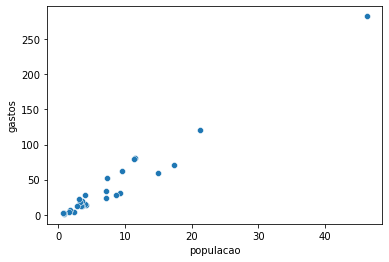

In [42]:
sns.scatterplot(data = gastos_e_populacao_recente / 1000000, x = "populacao", y = "gastos")

Text(0.5, 1.0, 'Gastos vs. População em Julho de 2020')

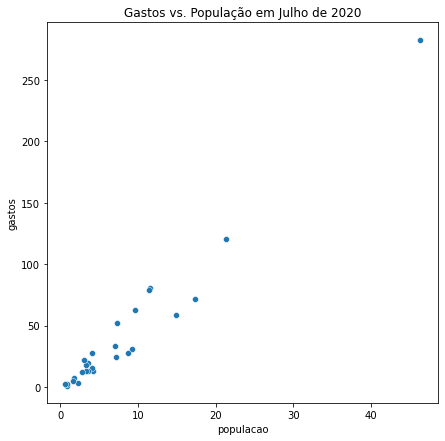

In [43]:
plt.figure(figsize = (7,7))
sns.scatterplot(data = gastos_e_populacao_recente / 1000000, x = "populacao", y = "gastos")
plt.title('Gastos vs. População em Julho de 2020')

Text(0.5, 1.0, 'Gastos por Habitante vs. População em Julho de 2020')

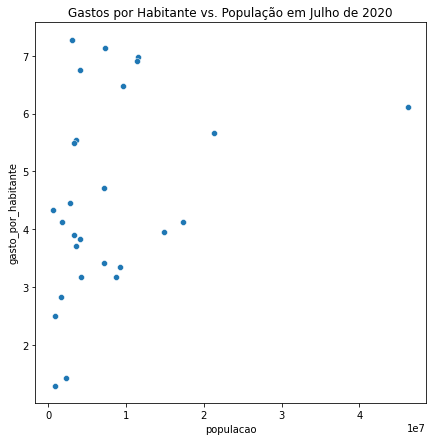

In [44]:
plt.figure(figsize = (7,7))
sns.scatterplot(data = gastos_e_populacao_recente, x = "populacao", y = "gasto_por_habitante")
plt.title('Gastos por Habitante vs. População em Julho de 2020')

In [45]:
url_dados = 'https://raw.githubusercontent.com/alura-cursos/agendamento-hospitalar/main/dados/A160324189_28_143_208.csv'
url_wikipedia = 'https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o'

populacao_junho2020, unida_junho2020 = data_cleaning(url_dados, url_wikipedia, '2020/Jun')

In [46]:
unida_junho2020["gastos"] = unida_junho2020['2020/Jun'] * 1000000
unida_junho2020["gasto_por_habitante"] = unida_junho2020["gastos"] / unida_maio2011['pop']

Text(0.5, 1.0, 'Gastos vs. População em Junho de 2020')

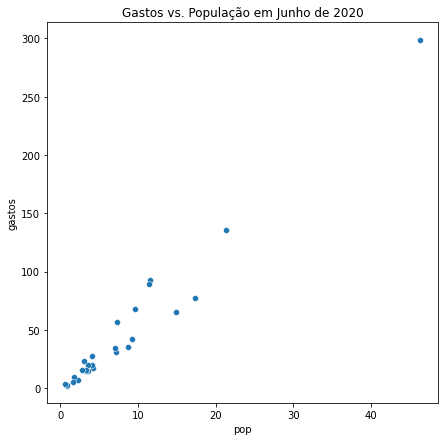

In [47]:
plt.figure(figsize = (7,7))
sns.scatterplot(data = unida_junho2020 / 1000000, x = "pop", y = "gastos")
plt.title('Gastos vs. População em Junho de 2020')

Text(0.5, 1.0, 'Gastos por Habitante vs. População em Junho de 2020')

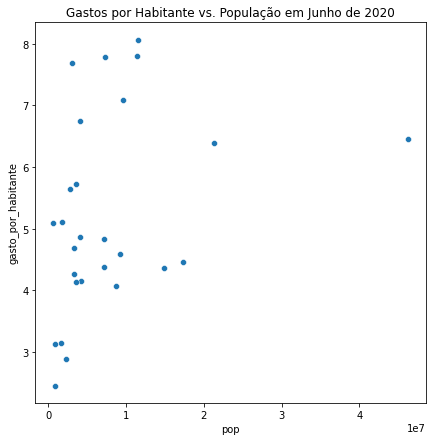

In [48]:
plt.figure(figsize = (7,7))
sns.scatterplot(data = unida_junho2020, x = "pop", y = "gasto_por_habitante")
plt.title('Gastos por Habitante vs. População em Junho de 2020')

Os gastos e gastos por habitante em junho e julho de 2020 são bem parecidos.

**Os dois meses no mesmo scatterplot**

Text(0.5, 1.0, 'Gastos por Habitante vs. População em Junho e Julho de 2020')

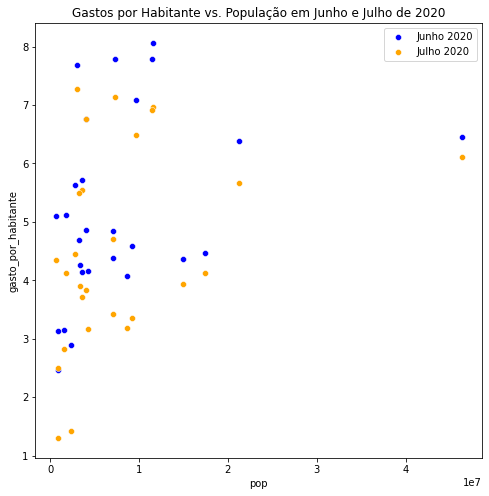

In [49]:
plt.figure(figsize = (8, 8))
sns.scatterplot(data = unida_junho2020, x = "pop", y = "gasto_por_habitante", color = 'blue')
sns.scatterplot(data = gastos_e_populacao_recente, x = "populacao", y = "gasto_por_habitante", color = 'orange')
plt.legend(['Junho 2020', 'Julho 2020'])
plt.title('Gastos por Habitante vs. População em Junho e Julho de 2020')

Aqui. plotando as duas informações no mesmo gráfico, fica evidente que em Julho de 2020 os gastos por habitante foram menores que em Junho de 2020. Um explicação pra isso é que pode ser que os dados não estejam completos no dataset utilizado.

O que aprendemos nesta aula:
- Como construir os primeiros gráficos com Seaborn.
- Como fazer comparações dos resultados de forma proporcional a população.
- Como analisar gráficos como de gastos_por_habitantes X população e gastos X população, comparando suas diferenças e gerando hipóteses.
- O que são e como usar Type hints.

## Aula 03 - Ticks, Escalas e Formatação de Imagens

In [50]:
ordenado_por_total = ordenado_por_total.drop(['2007/Ago', '2007/Set', '2007/Out', '2007/Nov', '2007/Dez', '2008/Jan'], axis = 1)
ordenado_por_total.index = ordenado_por_total.index.str[3:]

In [51]:
mensal = ordenado_por_total.T

In [52]:
mensal.head()

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,...,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008/Fev,172.83,70.30,48.86,45.90,44.12,33.41,26.22,24.41,27.64,18.15,...,9.71,8.11,7.93,7.93,4.64,5.05,1.94,1.74,0.77,1.28
2008/Mar,170.48,79.12,55.61,52.93,42.89,41.30,30.72,27.48,30.09,20.99,...,10.43,9.21,9.42,8.64,5.02,5.20,1.96,2.06,0.88,1.18
2008/Abr,170.28,79.05,56.12,51.97,45.30,42.83,30.59,27.81,31.38,21.05,...,10.23,10.47,9.39,8.53,5.27,5.34,2.14,2.06,0.90,1.40
2008/Mai,172.40,79.27,55.57,51.68,43.95,42.07,31.41,28.35,31.19,19.16,...,10.56,9.84,9.38,9.08,5.37,5.34,2.28,2.23,1.03,1.41
2008/Jun,175.42,79.61,56.09,53.76,44.10,39.91,28.95,28.99,29.46,20.33,...,10.47,10.29,9.45,8.65,4.98,5.40,2.62,2.11,0.94,1.42


<AxesSubplot:ylabel='Ceará'>

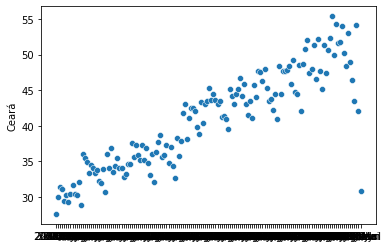

In [53]:
sns.scatterplot(x = ordenado_por_total.columns, y = ordenado_por_total.loc['Ceará'])

<AxesSubplot:ylabel='Ceará'>

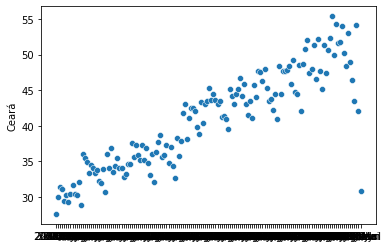

In [54]:
sns.scatterplot(data = mensal, x = mensal.index, y = 'Ceará')

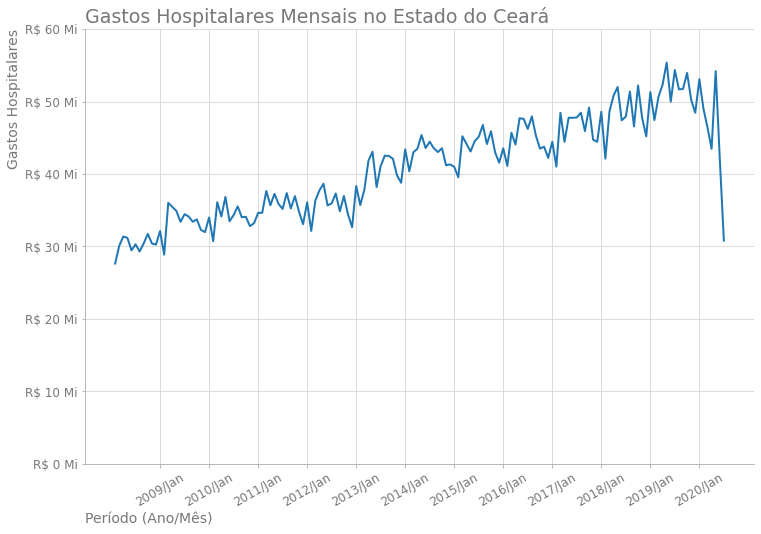

In [57]:
plt.figure(figsize = (12, 8))

ax = sns.lineplot(data = mensal, x = mensal.index, y = "Ceará", linewidth = 2)

plt.xticks(rotation = 30)
plt.ylim(0, 60)

plt.title('Gastos Hospitalares Mensais no Estado do Ceará', loc = 'left', fontsize = 19, color = '#76787B')
plt.ylabel('Gastos Hospitalares', fontsize = 14, loc = 'top', color = '#76787B')
plt.xlabel('Período (Ano/Mês)', fontsize = 14, loc = 'left', color = '#76787B')

ax.tick_params(color = 'darkgrey', bottom = 'off')
ax.spines['bottom'].set_color('darkgrey')
ax.spines['left'].set_color('darkgrey')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for i in ax.get_yticklabels() + ax.get_xticklabels():
    i.set_fontsize(12)
    i.set_color('#76787B')

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('R$ {x:,.0f} Mi'))
ax.xaxis.set_major_locator(ticker.IndexLocator(base = 12, offset = 11))
plt.grid(color= 'lightgray')

plt.show()

### Desafio 01: Fazer o scatter plot feito em aula para o seu estado, leia um pouco da documentação sobre este gráfico e teste alguns parâmetros.

### Desafio 02: Formatar o eixo y colocando a escala em milhões usando o StrMethodFormatter, colocar um título e colocar o título nos 2 eixos, alterando os tamanhos dos títulos.

Feitos acima.

**O que aprendemos nesta Aula:**
- Como criar um Scatterplot com o Seaborn; 
- Como formatar ticks ajustando sua localização da forma mais adequada possível;
- Como criar um grid em suas visualizações para facilitar a análise.

## Aula 04 - Trabalhando DateTime e Melt

Início com introdução sobre a biblioteca ```datetime``` e sua importação.

In [63]:
date.today()

datetime.date(2021, 6, 3)

In [65]:
meses = {
    "Jan" : 1,
    "Fev" : 2,
    "Mar" : 3,
    "Abr" : 4,
    "Mai" : 5,
    "Jun" : 6,
    "Jul" : 7,
    "Ago" : 8,
    "Set" : 9,
    "Out" : 10,
    "Nov" : 11,
    "Dez" : 12
}

def para_dia(ano_mes: str):
  ano: int = int(ano_mes[:4])
  mes: str = ano_mes[5:]
  mes_numero: int = meses[mes]
  return date(ano, mes_numero, 1)

mensal.index = mensal.index.map(para_dia)
mensal.head()

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,...,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008-02-01,172.83,70.30,48.86,45.90,44.12,33.41,26.22,24.41,27.64,18.15,...,9.71,8.11,7.93,7.93,4.64,5.05,1.94,1.74,0.77,1.28
2008-03-01,170.48,79.12,55.61,52.93,42.89,41.30,30.72,27.48,30.09,20.99,...,10.43,9.21,9.42,8.64,5.02,5.20,1.96,2.06,0.88,1.18
2008-04-01,170.28,79.05,56.12,51.97,45.30,42.83,30.59,27.81,31.38,21.05,...,10.23,10.47,9.39,8.53,5.27,5.34,2.14,2.06,0.90,1.40
2008-05-01,172.40,79.27,55.57,51.68,43.95,42.07,31.41,28.35,31.19,19.16,...,10.56,9.84,9.38,9.08,5.37,5.34,2.28,2.23,1.03,1.41
2008-06-01,175.42,79.61,56.09,53.76,44.10,39.91,28.95,28.99,29.46,20.33,...,10.47,10.29,9.45,8.65,4.98,5.40,2.62,2.11,0.94,1.42


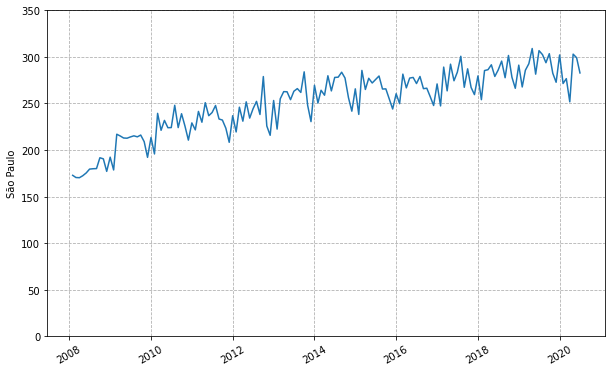

In [66]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal, x=mensal.index, y="São Paulo")
plt.xticks(rotation=30)
plt.ylim(0, 350)
plt.grid(linestyle="--")
plt.show()

### Desafio 01: Estudar a documentação DateTime do Python, escolha dois métodos para se aprofundar.

- **date.today()** - data de hoje
- **date.fromisoformat()** - converte uma string no formato ```AAAA-MM-DD``` para datetime
- **date.min / date.max** - data mínima e máxima suportadas, respectivamente

Podem ser realizadas as operações usuais de soma e subtração com datas.}

In [69]:
date.today() - date.fromisoformat('1997-09-17')

datetime.timedelta(days=8660)

In [70]:
date.min

datetime.date(1, 1, 1)

In [71]:
date.max

datetime.date(9999, 12, 31)

**Manipulando Dados com Melt**

In [72]:
mensal.head()

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,...,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008-02-01,172.83,70.30,48.86,45.90,44.12,33.41,26.22,24.41,27.64,18.15,...,9.71,8.11,7.93,7.93,4.64,5.05,1.94,1.74,0.77,1.28
2008-03-01,170.48,79.12,55.61,52.93,42.89,41.30,30.72,27.48,30.09,20.99,...,10.43,9.21,9.42,8.64,5.02,5.20,1.96,2.06,0.88,1.18
2008-04-01,170.28,79.05,56.12,51.97,45.30,42.83,30.59,27.81,31.38,21.05,...,10.23,10.47,9.39,8.53,5.27,5.34,2.14,2.06,0.90,1.40
2008-05-01,172.40,79.27,55.57,51.68,43.95,42.07,31.41,28.35,31.19,19.16,...,10.56,9.84,9.38,9.08,5.37,5.34,2.28,2.23,1.03,1.41
2008-06-01,175.42,79.61,56.09,53.76,44.10,39.91,28.95,28.99,29.46,20.33,...,10.47,10.29,9.45,8.65,4.98,5.40,2.62,2.11,0.94,1.42


In [123]:
mensal_aberto = mensal.reset_index().melt(id_vars = ['index'], value_vars = mensal.columns)
mensal_aberto.columns = ["dia_mes_ano", "uf", "gasto"]
mensal_aberto['dia_mes_ano'] = mensal_aberto['dia_mes_ano'].astype('datetime64')

In [124]:
mensal_aberto.head()

,dia_mes_ano,uf,gasto
0,2008-02-01,São Paulo,172.83
1,2008-03-01,São Paulo,170.48
2,2008-04-01,São Paulo,170.28
3,2008-05-01,São Paulo,172.40
4,2008-06-01,São Paulo,175.42


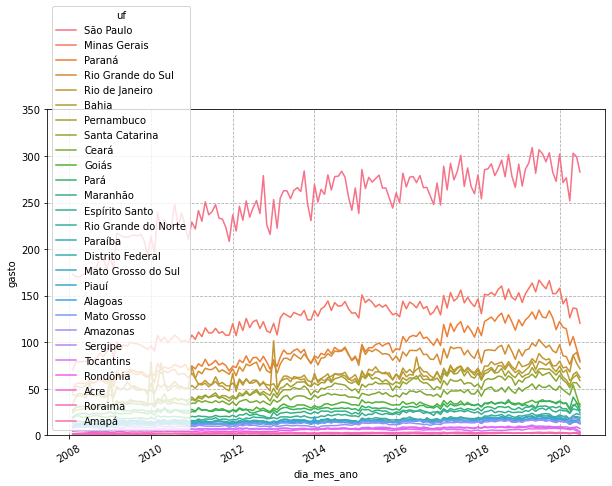

In [125]:
plt.figure(figsize = (10, 6))
ax = sns.lineplot(data = mensal_aberto, x = 'dia_mes_ano', y = 'gasto', hue = 'uf')
plt.xticks(rotation = 30)
plt.ylim(0, 350)
plt.grid(linestyle = "--")
plt.show()

### Desafio 02: Aprendemos a usar o Melt para desnormalizar sua base de dados, agora o desafio é realizar o processo contrário, voltar atrás partindo do mensal_aberto chegando no mensal.

- [pandas.pivot_table - documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html)

In [126]:
# usando pivot_table

mensal2 = mensal_aberto.pivot_table(index = 'dia_mes_ano', values = 'gasto', columns = 'uf')
mensal2.index.name = None
mensal2.columns.name = None
mensal2.head()

,Acre,Alagoas,Amapá,Amazonas,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,Maranhão,...,Piauí,Rio Grande do Norte,Rio Grande do Sul,Rio de Janeiro,Rondônia,Roraima,Santa Catarina,Sergipe,São Paulo,Tocantins
2008-02-01,1.74,8.11,1.28,7.93,33.41,27.64,10.22,10.03,18.15,13.45,...,9.71,9.11,45.90,44.12,1.94,0.77,24.41,4.64,172.83,5.05
2008-03-01,2.06,9.21,1.18,8.64,41.30,30.09,11.63,12.26,20.99,14.75,...,10.43,10.13,52.93,42.89,1.96,0.88,27.48,5.02,170.48,5.20
2008-04-01,2.06,10.47,1.40,8.53,42.83,31.38,11.92,12.45,21.05,15.15,...,10.23,10.96,51.97,45.30,2.14,0.90,27.81,5.27,170.28,5.34
2008-05-01,2.23,9.84,1.41,9.08,42.07,31.19,11.90,11.79,19.16,14.54,...,10.56,11.03,51.68,43.95,2.28,1.03,28.35,5.37,172.40,5.34
2008-06-01,2.11,10.29,1.42,8.65,39.91,29.46,11.97,11.89,20.33,14.55,...,10.47,10.45,53.76,44.10,2.62,0.94,28.99,4.98,175.42,5.40


### Desafio 03: Melhorar o gráfico da distribuição do gráfico:
- Escolha apenas alguns estados;
- Mude a paleta de cores;
- Posicione a legenda de forma mais adequada;
- Adicione título principal e nos eixos x e y.

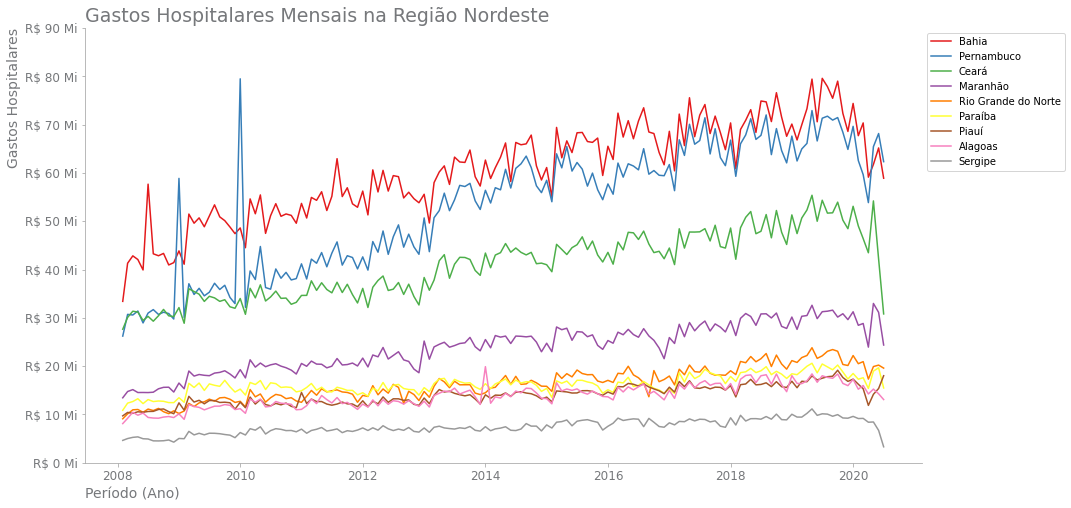

In [128]:
estados = ['Alagoas', 'Bahia', 'Ceará', 'Maranhão', 'Paraíba', 'Pernambuco', 'Piauí', 'Rio Grande do Norte', 'Sergipe']

plt.figure(figsize = (15, 8))
ax = sns.lineplot(data = mensal_aberto[mensal_aberto['uf'].isin(estados)], x = 'dia_mes_ano', y = 'gasto', hue = 'uf', palette = 'Set1')

plt.ylim(0, 90)

plt.title('Gastos Hospitalares Mensais na Região Nordeste', loc = 'left', fontsize = 19, color = '#76787B')
plt.ylabel('Gastos Hospitalares', fontsize = 14, loc = 'top', color = '#76787B')
plt.xlabel('Período (Ano)', fontsize = 14, loc = 'left', color = '#76787B')

ax.tick_params(color = 'darkgrey', bottom = 'off')
ax.spines['bottom'].set_color('darkgrey')
ax.spines['left'].set_color('darkgrey')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for i in ax.get_yticklabels() + ax.get_xticklabels():
    i.set_fontsize(12)
    i.set_color('#76787B')

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('R$ {x:,.0f} Mi'))

#plt.grid(color = 'lightgray')

plt.legend(bbox_to_anchor = (1, 1), loc = 'upper left')
plt.show()

**O que aprendemos nessa aula:**
- Quais caminhos não seguir na hora de trabalhar com Datatime;
- Como usar Map, aplicando uma função no DataFrame;
- Como usar o Melt no processamento dos dados.

# Aula 05 - Manipulando Datas e Gerando Novas Análises

In [129]:
mensal_aberto["dia_mes_ano"][0]

Timestamp('2008-02-01 00:00:00')

In [130]:
mensal_aberto["mes"] = mensal_aberto["dia_mes_ano"].dt.month
mensal_aberto["ano"] = mensal_aberto["dia_mes_ano"].dt.year
mensal_aberto.head()

,dia_mes_ano,uf,gasto,mes,ano
0,2008-02-01,São Paulo,172.83,2,2008
1,2008-03-01,São Paulo,170.48,3,2008
2,2008-04-01,São Paulo,170.28,4,2008
3,2008-05-01,São Paulo,172.40,5,2008
4,2008-06-01,São Paulo,175.42,6,2008


In [132]:
mensal_aberto.query(" uf == 'São Paulo' ")

,dia_mes_ano,uf,gasto,mes,ano
0,2008-02-01,São Paulo,172.83,2,2008
1,2008-03-01,São Paulo,170.48,3,2008
2,2008-04-01,São Paulo,170.28,4,2008
3,2008-05-01,São Paulo,172.40,5,2008
4,2008-06-01,São Paulo,175.42,6,2008
...,...,...,...,...,...
145,2020-03-01,São Paulo,276.61,3,2020
146,2020-04-01,São Paulo,251.70,4,2020
147,2020-05-01,São Paulo,302.86,5,2020
148,2020-06-01,São Paulo,299.06,6,2020


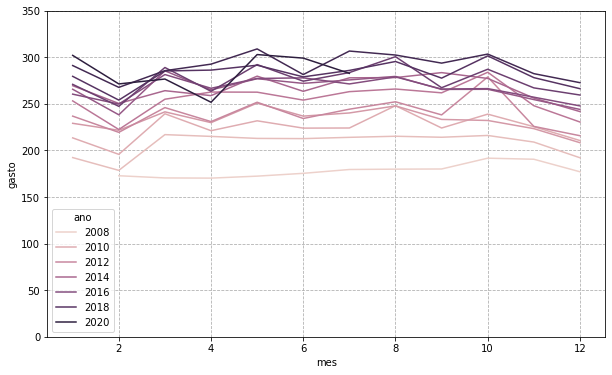

In [134]:
plt.figure(figsize = (10,6))
ax = sns.lineplot(data = mensal_aberto.query("uf=='São Paulo'"), x = "mes", y = "gasto", hue = "ano")
plt.ylim(0, 350)
plt.grid(linestyle = "--")
plt.show()

### Desafio 01: Melhorar o gráfico anterior.

In [156]:
# troca os values pelas keys e vice-versa
meses_reverso = {v: k for k, v in meses.items()}

mensal_aberto['mes_extenso'] = mensal_aberto['mes'].map(meses_reverso)
mensal_aberto.head()


# ordena os meses começando de Janeiro, para auxiliar no gráfico
mensal_aberto['mes_extenso'] = pd.Categorical(mensal_aberto['mes_extenso'],
                                   categories = meses.keys(),
                                   ordered = True)

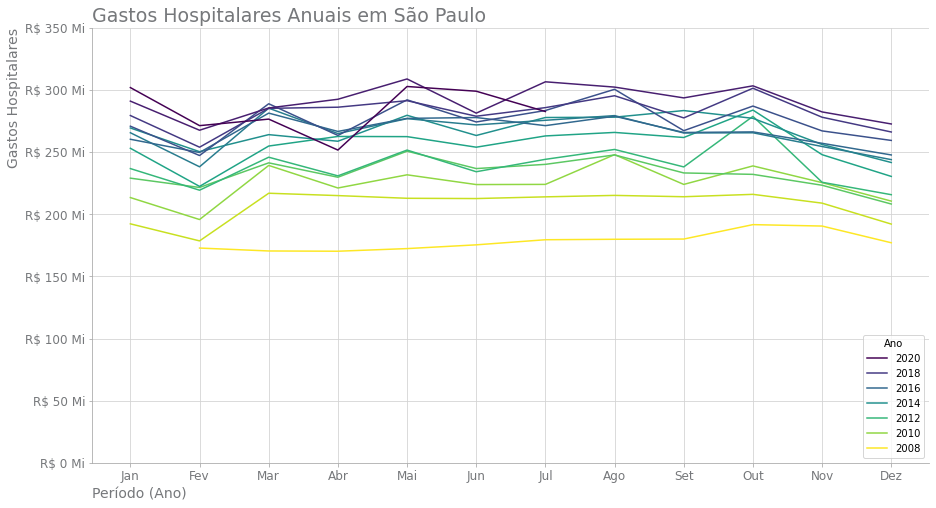

In [157]:
plt.figure(figsize = (15, 8))

ax = sns.lineplot(data = mensal_aberto.query("uf=='São Paulo'"), x = 'mes_extenso', y = 'gasto', hue = 'ano', palette = 'viridis_r')

plt.ylim(0, 350)

plt.title('Gastos Hospitalares Anuais em São Paulo', loc = 'left', fontsize = 19, color = '#76787B')
plt.ylabel('Gastos Hospitalares', fontsize = 14, loc = 'top', color = '#76787B')
plt.xlabel('Período (Ano)', fontsize = 14, loc = 'left', color = '#76787B')

ax.tick_params(color = 'darkgrey', bottom = 'off')
ax.spines['bottom'].set_color('darkgrey')
ax.spines['left'].set_color('darkgrey')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for i in ax.get_yticklabels() + ax.get_xticklabels():
    i.set_fontsize(12)
    i.set_color('#76787B')

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('R$ {x:,.0f} Mi'))

plt.grid(color = 'lightgray')

# para reverter a ordem em que os anos aparecem na legenda
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), title = 'Ano', loc = 'lower right')

plt.show()

### Desafio 02: Pegar estados de climas diferentes (por exemplo, norte e sul) e plotar o gráfico de linhas, comparar ambos e compartilhar suas análises.

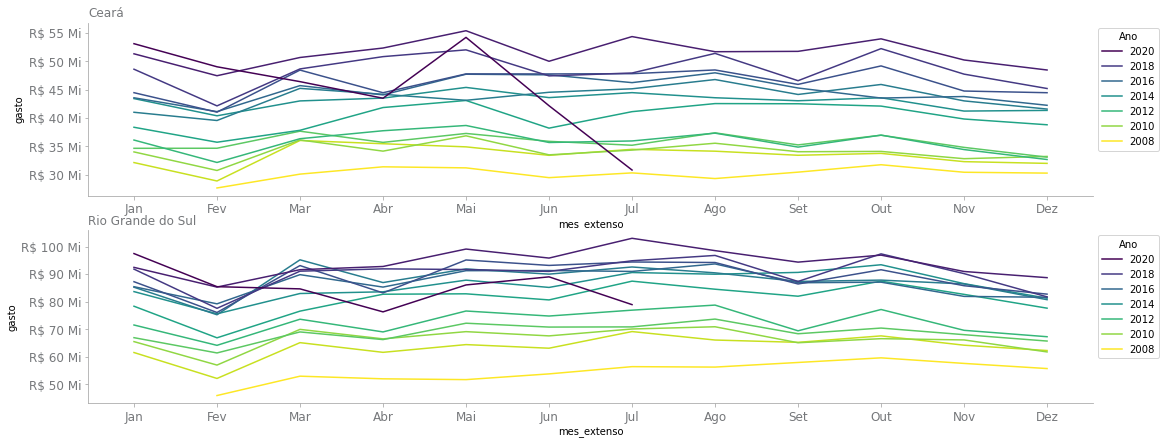

In [191]:
fig, ax = plt.subplots(2, 1, figsize = (18, 7))

ax[0] = sns.lineplot(ax = ax[0], data = mensal_aberto.query("uf=='Ceará'"), x = 'mes_extenso', y = 'gasto', hue = 'ano', palette = 'viridis_r')
ax[1] = sns.lineplot(ax = ax[1], data = mensal_aberto.query("uf=='Rio Grande do Sul'"), x = 'mes_extenso', y = 'gasto', hue = 'ano', palette = 'viridis_r')

ax[0].set_title('Ceará', loc = 'left', color = '#76787B')
ax[1].set_title('Rio Grande do Sul', loc = 'left', color = '#76787B')

for i in [0, 1]:
    ax[i].tick_params(color = 'darkgrey', bottom = 'off')
    ax[i].spines['bottom'].set_color('darkgrey')
    ax[i].spines['left'].set_color('darkgrey')
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].yaxis.set_major_formatter(ticker.StrMethodFormatter('R$ {x:,.0f} Mi'))
    
    # para reverter a ordem em que os anos aparecem na legenda
    handles, labels = ax[i].get_legend_handles_labels()
    ax[i].legend(reversed(handles), reversed(labels), title = 'Ano', bbox_to_anchor = (1, 1), loc = 'upper left')
    
    for k in ax[i].get_yticklabels() + ax[i].get_xticklabels():
        k.set_fontsize(12)
        k.set_color('#76787B')

plt.show()

**O que aprendemos nessa aula:**
- Como fazer uma comparação ano a ano dos custos do SUS usando o DateTime;
- Como analisar e manipular os dados para criar análises mais avançadas.

## Aula 06 - Agrupando Dados e Analisando por Categorias

In [192]:
estado_a_analisar = mensal_aberto.query("uf=='Ceará'")
estado_a_analisar.head()

,dia_mes_ano,uf,gasto,mes,ano,mes_extenso
1200,2008-02-01,Ceará,27.64,2,2008,Fev
1201,2008-03-01,Ceará,30.09,3,2008,Mar
1202,2008-04-01,Ceará,31.38,4,2008,Abr
1203,2008-05-01,Ceará,31.19,5,2008,Mai
1204,2008-06-01,Ceará,29.46,6,2008,Jun


In [193]:
gastos_por_ano = estado_a_analisar.groupby("ano").sum()
gastos_por_ano.head()

,gasto,mes
ano,,
2008,332.22,77
2009,400.77,78
2010,409.30,78
2011,428.37,78
2012,428.77,78


<AxesSubplot:xlabel='ano', ylabel='gasto'>

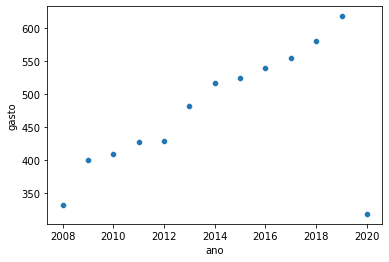

In [194]:
sns.scatterplot(data = gastos_por_ano, x =gastos_por_ano.index, y = "gasto")

<AxesSubplot:xlabel='ano', ylabel='gasto'>

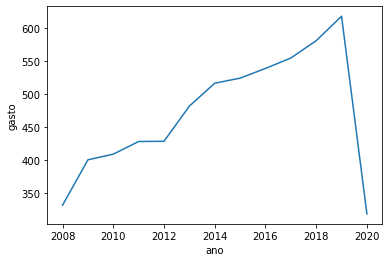

In [195]:
sns.lineplot(data = gastos_por_ano, x = gastos_por_ano.index, y = "gasto")

<AxesSubplot:xlabel='ano', ylabel='gasto'>

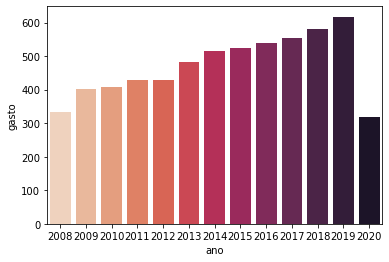

In [198]:
sns.barplot(data = gastos_por_ano, x = gastos_por_ano.index, y = "gasto", palette = sns.color_palette("rocket_r", 13))

### Desafio 01: Reordenar as cores do gráfico acima pelo valor do eixo y.

- https://stackoverflow.com/questions/36271302/changing-color-scale-in-seaborn-bar-plot

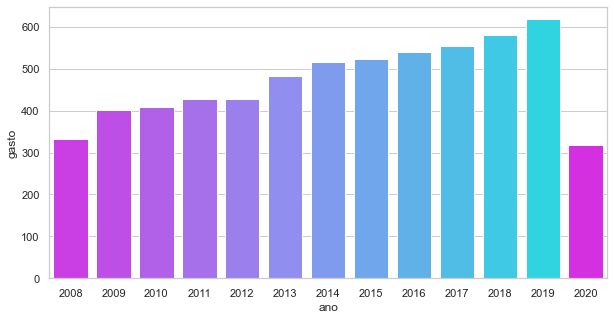

In [208]:
plt.figure(figsize = (10, 5))

sns.set(style="whitegrid", color_codes=True)

data = gastos_por_ano['gasto']

pal = sns.color_palette("cool", len(data))
rank = data.argsort().argsort()

sns.barplot(data = gastos_por_ano, x = gastos_por_ano.index, y = 'gasto', palette = np.array(pal[::-1])[rank])

plt.show()

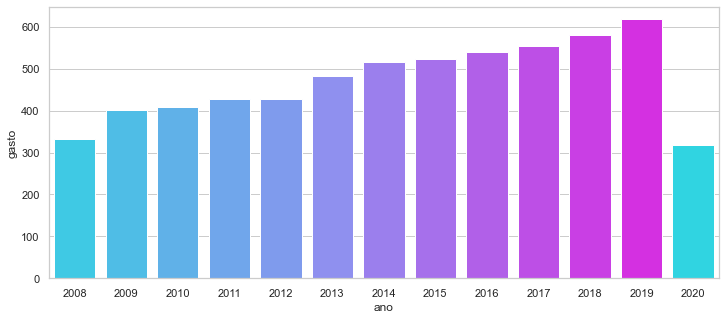

In [213]:
plt.figure(figsize = (12, 5))

sns.set(style = "whitegrid", color_codes = True)

data = gastos_por_ano['gasto']

pal = sns.color_palette("cool_r", len(data))
rank = data.argsort().argsort()

sns.barplot(data = gastos_por_ano, x = gastos_por_ano.index, y = 'gasto', palette = np.array(pal[::-1])[rank])

plt.show()

In [216]:
estados = ["Ceará", "Minas Gerais", "Pernambuco"]
por_ano_dos_estados = mensal_aberto.query("uf in @estados").groupby(["uf", "ano"]).sum().reset_index()
por_ano_dos_estados.head()

,uf,ano,gasto,mes
0,Ceará,2008,332.22,77
1,Ceará,2009,400.77,78
2,Ceará,2010,409.30,78
3,Ceará,2011,428.37,78
4,Ceará,2012,428.77,78


<AxesSubplot:xlabel='ano', ylabel='gasto'>

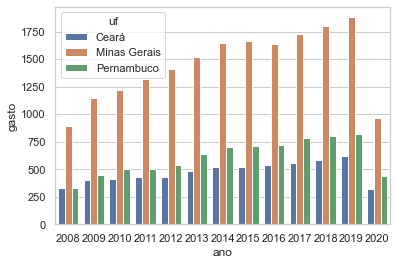

In [217]:
sns.barplot(data = por_ano_dos_estados, x = "ano", y = "gasto", hue = "uf")

<AxesSubplot:xlabel='ano', ylabel='gasto'>

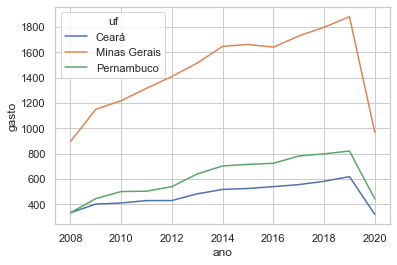

In [218]:
sns.lineplot(data=por_ano_dos_estados, x="ano", y="gasto", hue="uf")

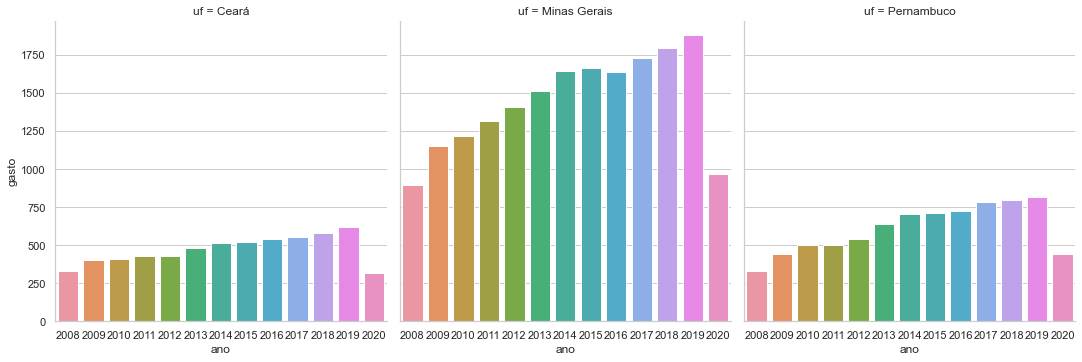

In [219]:
sns.catplot(data = por_ano_dos_estados, y = "gasto", x = "ano", kind = "bar", col = "uf")

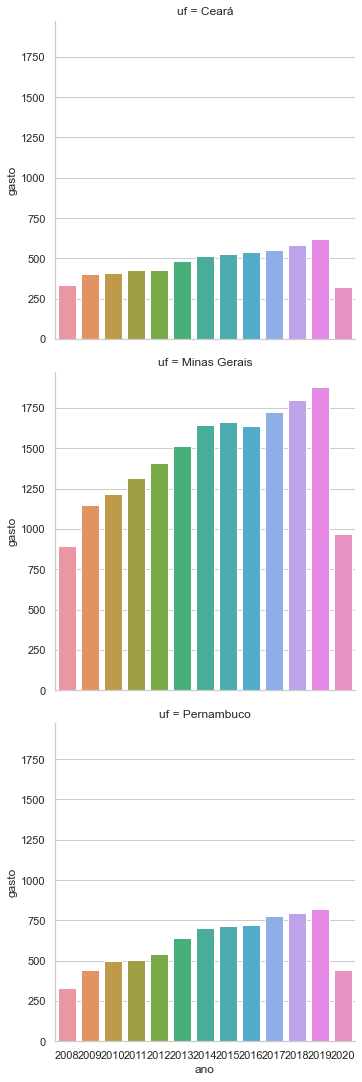

In [221]:
sns.catplot(data = por_ano_dos_estados, y = "gasto", x = "ano", kind = "bar", row = "uf")

### Desafio 02: Explorar a documentação do Seaborn.

### Desafio 03: Pensar e elaborar novos gráficos depois de estudar o Seaborn, compartilhar com uma breve descrição no Discord, para que outros colegas aprendam sobre o gráfico usado.

### Desafio 04: Baixe uma outra base de dados do tabnet e execute sua análise de forma similar a aula.

**O que aprendemos nessa aula:**
- Como usar o Groupby;
- Como alterar a Palete de cores do seu gráfico com seaborn;
- Como usar a Palete de cores para ajudar na interpretação dos gráficos;
- O que é e como usar o catplot para comparar categorias.